In this project, we will build a convolution neural network in Keras with python on a CIFAR-10 dataset. First, we will explore our dataset, and then we will train our neural network using python and Keras.

#What is Image Classification

Image classification is a fascinating deep learning project. Specifically, image classification comes under the computer vision project category.

* The classification problem is to categorize all the pixels of a digital image into one of the defined classes.
* Image classification is the most critical use case in digital image analysis.
* Image classification is an application of both supervised classification and unsupervised classification.
    * In supervised classification, we select samples for each target class. We train our neural network on these target class samples and then classify new samples.
    * In unsupervised classification, we group the sample images into clusters of images having similar properties. Then, we classify each cluster into our intended classes.



#About Image Classification Dataset

CIFAR-10 is a very popular computer vision dataset. This dataset is well studied in many types of deep learning research for object recognition.

This dataset consists of 60,000 images divided into 10 target classes, with each category containing 6000 images of shape 32x32. This dataset contains images of low resolution (32x32), which allows researchers to try new algorithms. The 10 different classes of this dataset are:

Airplane, Car, Bird, Cat, Deer, Dog, Frog, Horse, Ship, and Truck

CIFAR-10 dataset is already available in the datasets module of Keras. We do not need to download it; we can directly import it from keras.datasets.

#### 1. Load the dataset from keras datasets module

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


#### 2. Plot some images from the dataset to visualize the dataset

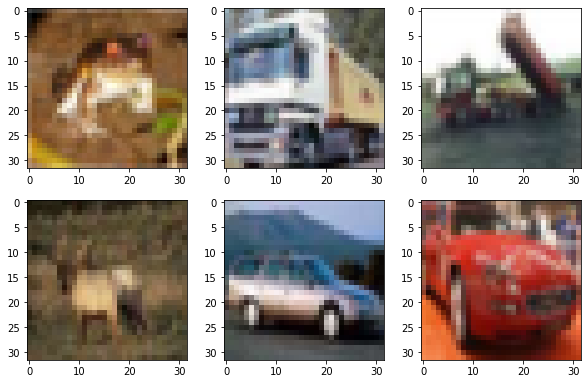

In [2]:
n=6
plt.figure(figsize=(10,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

#### 3. Import the required layers and modules to create our convolution neural net architecture

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

#### 4. Convert the pixel values of the dataset to float type and then normalize the dataset

In [4]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

#### 5. Now perform the one-hot encoding for target classes

In [5]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)

num_classes=test_Y.shape[1]

#### 6. Create the sequential model and add the layers

In [6]:
model=Sequential()
model.add(Conv2D(32, (5,5), input_shape=(32,32,3),  padding='same',
                 activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (5,5), padding='same',
                 activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, (3,3), padding='same',
                 activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#### 7. Configure the optimizer and compile the model

In [7]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
# sgd=RMSprop(lr=0.001,momentum=0.9)
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd, 
              metrics=['accuracy'])

#### 8. View the model summary for better understanding of model architecture

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9

#### 9. Train the model

In [9]:
model.fit(train_X, train_Y, 
          validation_data=(test_X,test_Y),
          epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8640 - accuracy: 0.3056 - val_loss: 1.5438 - val_accuracy: 0.4265
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4881 - accuracy: 0.4549 - val_loss: 1.2902 - val_accuracy: 0.5376
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2991 - accuracy: 0.5325 - val_loss: 1.1397 - val_accuracy: 0.5879
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1743 - accuracy: 0.5799 - val_loss: 1.0862 - val_accuracy: 0.6150
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0806 - accuracy: 0.6152 - val_loss: 0.9976 - val_accuracy: 0.6467
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0059 - accuracy: 0.6433 - val_loss: 0.9375 - val_accuracy: 0.6742
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9449 - accuracy: 0.6666 - val_loss: 0.8918 - val_accuracy:

#### 10. Calculate its accuracy on testing data

In [10]:
score, acc = model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.8267 - accuracy: 0.7116
71.16000056266785


#### 11. Save the model



In [11]:
model.save("model1_cifar_10epoch.h5")

#### 12. Make a dictionary to map to the output classes and make predictions from the model

In [28]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
img=Image.open("/content/horse1.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)

img=img.resize((32,32))
img=np.expand_dims(img,axis=0)
img=np.array(img)
pred=model.predict_classes([img])[0]
print(f"{pred}:'{results[pred]}'")


7:'horse'


In [14]:
i = img.resize((32,32))

In [15]:
i = np.expand_dims( i, axis=(0))

In [16]:
i.shape

(1, 32, 32, 3)

In [17]:
i = np.array(i)

In [22]:
p = model.predict_classes([i])[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [18]:
p = model.predict(i)

In [23]:
p

7

In [24]:
results[p]

'horse'